# Assignment 1 
## Step 1 Import necessary libraries

In [42]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

## Step 2: Load the datasets

In [51]:
wine_data = pd.read_csv('wine.csv') 
wine_quality_data = pd.read_csv('winequality.csv',sep=';', quotechar='"') 
wine_data,wine_quality_data

(     Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium   
 0        1    14.23        1.71  2.43               15.6        127  \
 1        1    13.20        1.78  2.14               11.2        100   
 2        1    13.16        2.36  2.67               18.6        101   
 3        1    14.37        1.95  2.50               16.8        113   
 4        1    13.24        2.59  2.87               21.0        118   
 ..     ...      ...         ...   ...                ...        ...   
 173      3    13.71        5.65  2.45               20.5         95   
 174      3    13.40        3.91  2.48               23.0        102   
 175      3    13.27        4.28  2.26               20.0        120   
 176      3    13.17        2.59  2.37               20.0        120   
 177      3    14.13        4.10  2.74               24.5         96   
 
      Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins   
 0             2.80        3.06                  0.28       

# Step 3 4 Prepare the data and Standardize the wine dataset

In [44]:
# Step 3: Split the datasets into features and labels
# For wine dataset
wine_features = wine_data.drop('Class', axis=1)
wine_labels = wine_data['Class']

# Step 4: Split the wine dataset into training and testing sets
wine_quality_features = wine_quality_data.drop('quality', axis=1)
wine_quality_labels = wine_quality_data['quality']

# Step 4: Split the wine dataset into training and testing sets
wine_features_train, wine_features_test, wine_labels_train, wine_labels_test = train_test_split(
    wine_features, wine_labels, test_size=0.2, random_state=42)

# 划分训练集和测试集
wine_quality_features_train, wine_quality_features_test, wine_quality_labels_train, wine_quality_labels_test = train_test_split(
    wine_quality_features, wine_quality_labels, test_size=0.2, random_state=42)

# Step 5: Standardize the wine dataset
scaler = StandardScaler()
wine_features_train_standardized = scaler.fit_transform(wine_features_train)
wine_features_test_standardized = scaler.transform(wine_features_test)
scaler = StandardScaler()
wine_quality_features_train_standardized = scaler.fit_transform(wine_quality_features_train)
wine_quality_features_test_standardized = scaler.transform(wine_quality_features_test)


## Step 6: Apply PCA for dimensionality reduction

In [45]:
pca_wine = PCA(n_components=2)
wine_features_train_pca = pca_wine.fit_transform(wine_features_train_standardized)
wine_features_test_pca = pca_wine.transform(wine_features_test_standardized)
wine_features_test_pca

array([[ 2.06784347, -1.02818265],
       [ 1.12826003, -1.75112288],
       [-2.69423625, -0.19090259],
       [ 2.45626317, -1.38836512],
       [ 0.29065031,  2.37690085],
       [ 2.12402993, -2.39691265],
       [-0.40904513,  2.2194952 ],
       [-2.57625722, -1.60581379],
       [ 1.62867609,  1.34373782],
       [-2.20209218, -0.27412877],
       [ 1.78436041,  0.2368371 ],
       [-2.32016653, -2.03364771],
       [ 0.7147604 , -0.18580121],
       [-2.30063977,  1.32472024],
       [ 2.26062893, -1.75000767],
       [-0.17678838,  1.98449992],
       [-0.35544197,  2.21343192],
       [-0.38581464,  2.32808535],
       [ 2.72374852, -0.94733607],
       [-0.39810197,  1.88935422],
       [ 3.4607463 , -2.74399183],
       [ 2.28975172,  1.66819176],
       [-1.40622608,  1.34797468],
       [-2.408058  , -2.29855094],
       [-3.62384862, -0.74557649],
       [-2.92744648, -1.43296026],
       [ 0.01364943,  1.99332546],
       [ 0.93494629,  0.67495608],
       [-1.21973431,

# Assignment 2

In [52]:
# Step 1: Build K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(wine_features_train_standardized)

# Step 2: Compare true labels with cluster labels using Fowlkes-Mallows Index
fmi_score = fowlkes_mallows_score(wine_labels_train, wine_clusters)
print(f"Fowlkes-Mallows Index: {fmi_score}")

Fowlkes-Mallows Index: 0.9280318290748156


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

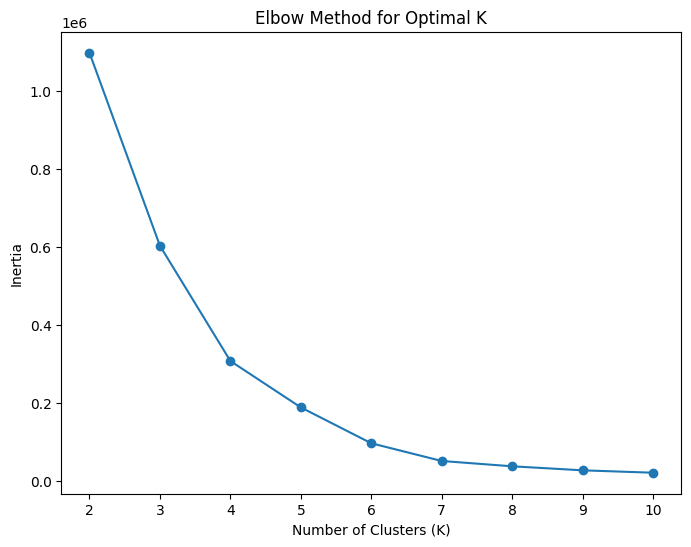

In [53]:
# Step 3: Determine the optimal number of clusters (2 to 10)
cluster_range = range(2, 11)
inertia_values = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(wine_features_test)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

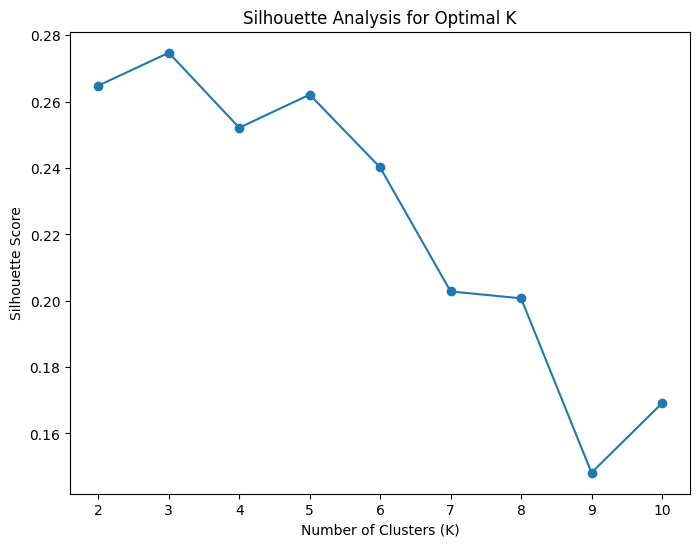

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

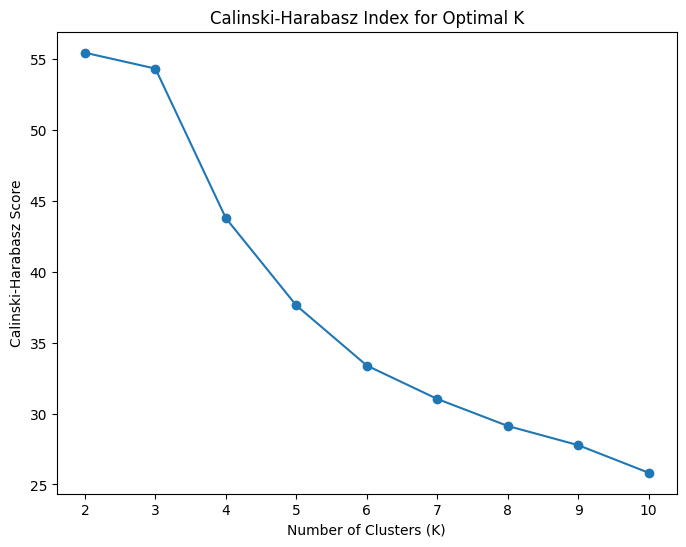

In [55]:
# Step 4: Silhouette analysis to determine the optimal number of clusters
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(wine_features_train_standardized)
    silhouette_scores.append(silhouette_score(wine_features_train_standardized, cluster_labels))

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 5: Calinski-Harabasz index to determine the optimal number of clusters
ch_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(wine_features_train_standardized)
    ch_scores.append(calinski_harabasz_score(wine_features_train_standardized, cluster_labels))

# Plot the Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

In [49]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(wine_features_train_standardized, wine_labels_train)

# 构建梯度提升回归模型
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(wine_quality_features_train, wine_quality_labels_train)

# 预测测试集
linear_regression_predictions = linear_regression_model.predict(wine_features_test_standardized)
gradient_boosting_predictions = gradient_boosting_model.predict(wine_quality_features_test)

# 评价模型性能
def evaluate_regression_model(true_labels, predicted_labels, model_name):
    mse = mean_squared_error(true_labels, predicted_labels)
    mae = median_absolute_error(true_labels, predicted_labels)
    evs = explained_variance_score(true_labels, predicted_labels)
    
    print(f"\nEvaluation for {model_name} Model:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Median Absolute Error (MAE): {mae}")
    print(f"Explained Variance Score (EVS): {evs}")

# 评价线性回归模型
evaluate_regression_model(wine_labels_test, linear_regression_predictions, "Linear Regression")

# 评价梯度提升回归模型
evaluate_regression_model(wine_quality_labels_test, gradient_boosting_predictions, "Gradient Boosting Regression")


Evaluation for Linear Regression Model:
Mean Squared Error (MSE): 0.0685334846425599
Median Absolute Error (MAE): 0.15244943797343102
Explained Variance Score (EVS): 0.8826275483099185

Evaluation for Gradient Boosting Regression Model:
Mean Squared Error (MSE): 0.3623352320145906
Median Absolute Error (MAE): 0.43477646630172995
Explained Variance Score (EVS): 0.4468715482546276


In [50]:
# 构建SVM模型
svm_model = SVC(kernel='linear', C=1)  # 可以选择不同的核函数和超参数
svm_model.fit(wine_features_train_standardized, wine_labels_train)

# 预测测试集结果
svm_predictions = svm_model.predict(wine_features_test_standardized)

# 打印分类报告，评价模型性能
print("Classification Report:")
print(classification_report(wine_labels_test, svm_predictions))

# 打印准确度
accuracy = accuracy_score(wine_labels_test, svm_predictions)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Accuracy: 0.9722222222222222
